# WeatherPy

# Observations from the data 

1) The R values for the northern and southern hemispheres varied much more than I had expected, the northern hemisphere has a much stronger relationship of decreasing temperature as distance from the equator increases. This is due to the larger volume of water relative to the northern hemisphere, making it warmer. 

2) Based on the data it would appear that there are more clouds in the northern hemisphere than the southern, which contradicts the first observation. According to research, the southern hemisphere is indeed cloudier than the north which I thought was fascinating. (Link to research on cloud density): https://www.researchgate.net/publication/235953439_Observational_Analysis_of_Cloud_and_Precipitation_in_Midlatitude_Cyclones_Northern_versus_Southern_Hemisphere_Warm_Fronts

3)There is a trend of increasing humidity from the South pole to the North pole. I made a global linear regression of humidity vs latitude, and found that across several iterations of randomly selected cities the trend remained and average humidity increases from south to north.  

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from datetime import date

# Import API key and set units
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set base url to make requests
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city list and count to confirm sufficient count and proper syntax
len(cities)

609

### Perform API Calls

In [8]:
#Creating all of the lists which will be appeneded in the following for loop
cityName = []
cloudiness = []
date = []
humidity = []
lats = []
lngs = []
maxTemp = []
windSpeed = []
country = []

#Creating 2 counter variables to keep track of the number in each set being printed
#set counter starts at one so we don't get a set "zero"
counter = 0
set_counter = 1

# Print statement header 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#for loop with try and except statement to prevent the compile from erroring and stopping due to lacking info on a city
for city in cities:
    try:
        #Requesting info from the url and appending all of our lists with this info
        response = requests.get(url + city).json()
        cityName.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        #logic to count through the sets and numbers in each set, resetting at 50 in each set adding one to set after each 50 counts
        if counter > 49:
            counter = 1
            set_counter += 1
        else:
            #if less than 50 in record, add 1 to record #, this also allows us to start at 1 instead of zero
            counter += 1
            
        #formatting from guidelines    
        print(f"Processing Record {counter} of Set {set_counter} | {city}")

    #If there is an error due to missing info, print this statement
    except: 
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ndola
Processing Record 3 of Set 1 | salalah
City not found. Skipping...
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | mehamn
City not found. Skipping...
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | castelo do piaui
Processing Record 10 of Set 1 | douentza
Processing Record 11 of Set 1 | itupiranga
Processing Record 12 of Set 1 | westport
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | codajas
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | atuona
City not found. Skipping...
Processing Record 20 of Set 1 | itoman
Processing Record 21 of 

Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | betsiamites
Processing Record 42 of Set 4 | teluknaga
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | nanning
Processing Record 46 of Set 4 | balkanabat
Processing Record 47 of Set 4 | livadi
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | cap malheureux
Processing Record 50 of Set 4 | yanam
Processing Record 1 of Set 5 | port hardy
Processing Record 2 of Set 5 | california city
Processing Record 3 of Set 5 | aykhal
Processing Record 4 of Set 5 | laurel
Processing Record 5 of Set 5 | ginir
Processing Record 6 of Set 5 | morondava
Processing Record 7 of Set 5 | mayumba
Processing Record 8 of Set 5 | shingu
Processing Record 9 of Set 5 | upernavik
Processing Record 10 of Set 5 | maine-soroa
Processing Record 11 of Set 5 | sisimiut
Processing Record 12 of Set 5 | torbay
Processing Record 13 of Set 5 | mahebourg
City not foun

Processing Record 30 of Set 8 | mende
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 8 | ahuimanu
Processing Record 32 of Set 8 | fortuna
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | diego de almagro
Processing Record 35 of Set 8 | perry
Processing Record 36 of Set 8 | taseyevo
Processing Record 37 of Set 8 | amalapuram
City not found. Skipping...
Processing Record 38 of Set 8 | mayor pablo lagerenza
Processing Record 39 of Set 8 | quatre cocos
Processing Record 40 of Set 8 | saint augustine
Processing Record 41 of Set 8 | smidovich
Processing Record 42 of Set 8 | omsukchan
Processing Record 43 of Set 8 | bontang
Processing Record 44 of Set 8 | nanakuli
Processing Record 45 of Set 8 | tselinnoye
Processing Record 46 of Set 8 | ewa beach
Processing Record 47 of Set 8 | george
Processing Record 48 of Set 8 | watsa
Processing Record 49 of Set 8 | mahon
Processing Record 50 of Set 8 | mahanoro
Processing Record 1 of Set 9 | 

In [9]:
#Creating the list of dictionaries which will be converted into a dataframe
weather_dict = {
    "City": cityName,
    "Cloudiness": cloudiness ,
    "Country": country ,
    "Date": date,
    "Humidity": humidity ,
    "Lat.": lats,
    "Lng.": lngs, 
    "Max Temp": maxTemp ,
    "Wind Speed": windSpeed
}

#Creating the dataframe 
weather_df = pd.DataFrame(weather_dict)

#Showing the count of all values in the dataframe
weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat.          563
Lng.          563
Max Temp      563
Wind Speed    563
dtype: int64

In [10]:
#exporting dataframe into a csv to be used later
weather_df.to_csv(output_data_file)

#first 5 rows of dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,Port Elizabeth,20,ZA,1579983852,93,-33.92,25.57,66.20,4.70
1,Ndola,25,ZM,1579983852,95,-12.96,28.64,63.77,4.34
2,Salalah,56,OM,1579983852,83,17.02,54.09,73.00,5.84
3,Lata,0,PT,1579983853,92,40.16,-8.33,53.01,1.16
4,Pevek,100,RU,1579983732,96,69.70,170.31,-16.02,3.60


### Plotting the Data

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

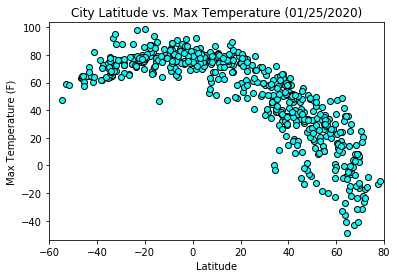

In [14]:
#creating the scatter plot
plt.scatter(lats, maxTemp, edgecolors="black", facecolors="aqua")

#plot axis and title formatting
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({d1})")

#setting axis bounds
plt.axis([-60, 80, min(maxTemp)-5, max(maxTemp)+5])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Max_Temperature.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

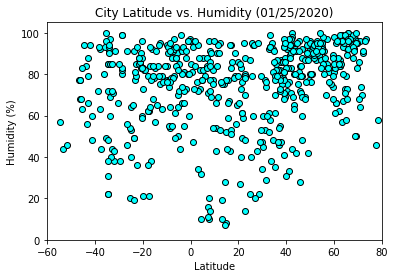

In [15]:
#creating the scatter plot
plt.scatter(lats, humidity, edgecolors="black", facecolors="aqua")

#plot labels
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({d1})")

#axis limits
plt.axis([-60, 80, 0, max(humidity)+5])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

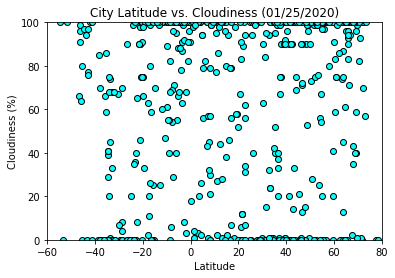

In [16]:
#creating scatter plot
plt.scatter(lats, cloudiness, edgecolors="black", facecolors="aqua")

#axis labels
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({d1})")

#axis limits
plt.axis([-60, 80, 0, 100])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

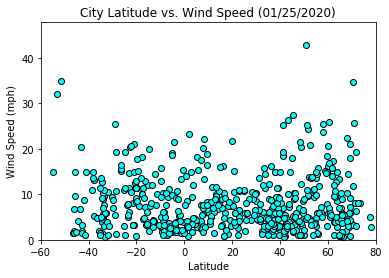

In [17]:
#creating scatter plot
plt.scatter(lats, windSpeed, edgecolors="black", facecolors="aqua")

#creating axis labels
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({d1})")

#axis limits
plt.axis([-60, 80, 0, max(windSpeed)+5])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Wind_Speed.png")
plt.show

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
#northern hemisphere dataframe has lat > 0
northern_lat = weather_df["Lat."] > 0
northern_df = weather_df[northern_lat]

#southern hemisphere has latitude <0
southern_lat = weather_df["Lat."] < 0
southern_df = weather_df[southern_lat]

#displaying first 5 rows of southern only dataframe to check it worked
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,Port Elizabeth,20,ZA,1579983852,93,-33.92,25.57,66.20,4.70
1,Ndola,25,ZM,1579983852,95,-12.96,28.64,63.77,4.34
8,Castelo do Piaui,100,BR,1579983592,64,-5.32,-41.55,83.16,1.88
10,Itupiranga,100,BR,1579983854,70,-5.13,-49.33,84.02,1.63
13,Codajas,100,BR,1579983854,99,-3.84,-62.06,75.13,2.33


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

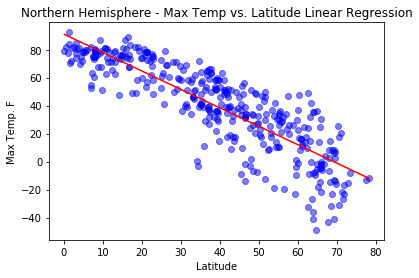

R Value is: -0.8549579338781114 and P Value is: 4.285698233997903e-108


In [19]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Max Temp"]

#creating linear regression and setting variables related to output
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob', alpha =.5)
plt.plot(x1,y1,'-r')

#plot axis and title formatting
plt.xlabel("Latitude")
plt.ylabel("Max Temp. F")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

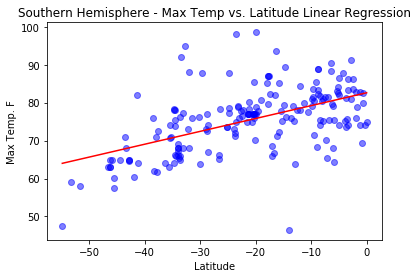

R Value is: 0.5346799348242928 and P Value is: 2.2868534806144286e-15


In [20]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Max Temp"]

#creating linear regression and setting variables related to output
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob', alpha =.5)
plt.plot(x1,y1,'-r')

#plot axis and title formatting
plt.xlabel("Latitude")
plt.ylabel("Max Temp. F")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Global Hemisphere - Humidity (%) vs. Latitude Linear Regression

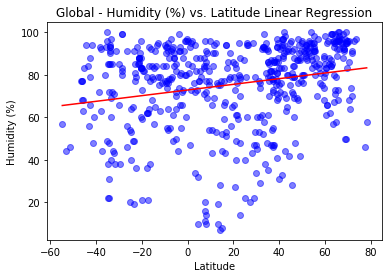

R Value is: 0.22199767881391094 and P Value is: 1.0245052580054518e-07


In [21]:
#setting x and y variables to run regression
x =  weather_df["Lat."]
y = weather_df["Humidity"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Global - Humidity (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

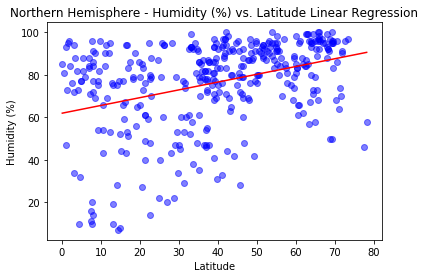

R Value is: 0.35879979966967335 and P Value is: 8.3508023311537e-13


In [22]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Humidity"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

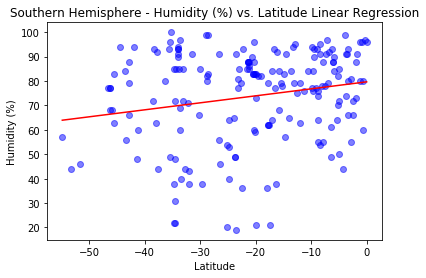

R Value is: 0.20217085099421278 and P Value is: 0.005273756299976703


In [23]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Humidity"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

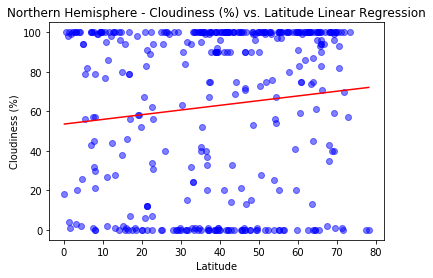

R Value is: 0.115795237611883 and P Value is: 0.02512890522415881


In [24]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Cloudiness"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)


#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

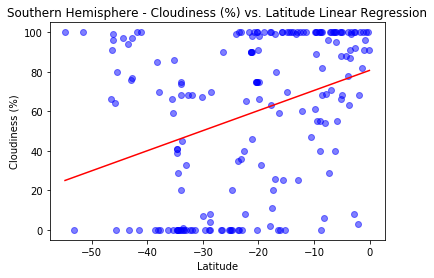

R Value is: 0.34645276010731363 and P Value is: 1.0425306800040995e-06


In [25]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Cloudiness"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')


#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

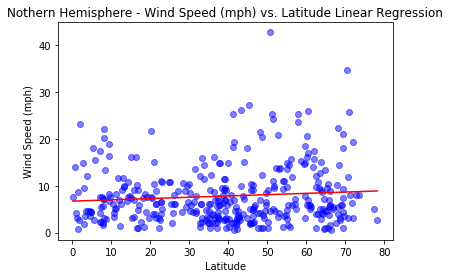

R Value is: 0.09231042003103844 and P Value is: 0.07458117160025943


In [26]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Wind Speed"]

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)


#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Nothern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

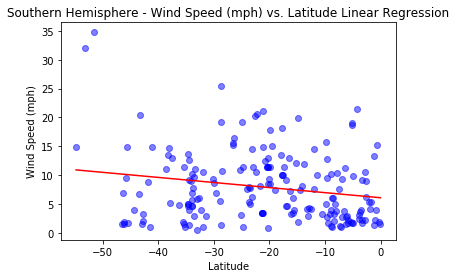

R Value is: -0.197822240487216 and P Value is: 0.006360718213210134


In [27]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Wind Speed"]

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)


#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")